In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau
from matplotlib import pyplot

In [4]:
make_circles

<function sklearn.datasets._samples_generator.make_circles(n_samples=100, *, shuffle=True, noise=None, random_state=None, factor=0.8)>

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
tf.test.is_built_with_cuda()

True

In [8]:
#load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [9]:
#check the dimensional
x_train.shape          # 5000 samples , the shape is 32*32 ,3d dimensional

(50000, 32, 32, 3)

In [10]:
x_train[0].shape

(32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_train[ 0: 5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
def plot_sample(index):
    plt.figure(figsize= (10, 1))
    plt.imshow(x_train[index])

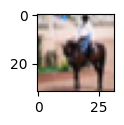

In [14]:
plot_sample(11)

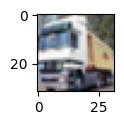

In [15]:
plot_sample(1)

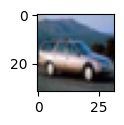

In [16]:
plot_sample(4)

In [17]:
classes_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'ship']

In [18]:
y_train[3]

array([4], dtype=uint8)

In [19]:
classes_names[y_train[3][0]]

'deer'

# ***Scaling***

In [20]:
x_train_scaled = x_train[0]/255       #because the rgb is from 0 to 255
x_train_scaled

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [21]:
x_train_scaled.shape

(32, 32, 3)

In [22]:
x_train_scaled = x_train / 255.0
x_train_scaled = x_train_scaled.reshape(50000, 32, 32, 3)

In [23]:
y_train_scaled = y_train[0]/255
y_train_scaled

array([0.02352941])

In [24]:
y_train_categorical = tf.keras.utils.to_categorical(y_train)

In [25]:
x_test_scaled = x_test / 225
x_test_scaled = x_test_scaled.reshape(10000, 32, 32, 3)

In [26]:
x_test_scaled.shape

(10000, 32, 32, 3)

In [27]:
x_test_scaled

array([[[[0.70222222, 0.49777778, 0.21777778],
         [0.70666667, 0.49333333, 0.20888889],
         [0.73333333, 0.51555556, 0.22666667],
         ...,
         [0.60888889, 0.42222222, 0.16      ],
         [0.56      , 0.40444444, 0.16      ],
         [0.51555556, 0.37777778, 0.14666667]],

        [[0.67555556, 0.49777778, 0.22666667],
         [0.67111111, 0.48888889, 0.17777778],
         [0.70666667, 0.50666667, 0.2       ],
         ...,
         [0.60444444, 0.42222222, 0.13777778],
         [0.55555556, 0.40444444, 0.14222222],
         [0.52888889, 0.39111111, 0.15111111]],

        [[0.67111111, 0.48888889, 0.20888889],
         [0.67111111, 0.48444444, 0.14666667],
         [0.70222222, 0.49333333, 0.16      ],
         ...,
         [0.61777778, 0.43555556, 0.15111111],
         [0.57777778, 0.42222222, 0.15111111],
         [0.53333333, 0.39555556, 0.14666667]],

        ...,

        [[0.30222222, 0.55111111, 0.78666667],
         [0.18666667, 0.44444444, 0.65777778]

# ***Model Building***

In [28]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [29]:
#Coding the layers of model
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (32, 32, 3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
     keras.layers.Dense(10, activation = 'sigmoid'),

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
#compile the model
model.compile(optimizer= 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#fit the model
model.fit(x_train_scaled, y_train_categorical, epochs = 25)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 87ms/step - accuracy: 0.3099 - loss: 1.9249
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 86ms/step - accuracy: 0.4202 - loss: 1.6404
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 85ms/step - accuracy: 0.4541 - loss: 1.5483
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 89ms/step - accuracy: 0.4753 - loss: 1.4927
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 83ms/step - accuracy: 0.4925 - loss: 1.4402
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.5064 - loss: 1.3893
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 82ms/step - accuracy: 0.5285 - loss: 1.3401
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 90ms/step - accuracy: 0.5417 - loss: 1.3100
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.5500 - loss: 1.2768
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 86ms/step - accuracy: 0.5638 - loss: 1.2469
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 86ms/step - accuracy: 0.5728 - loss: 1.22

# ***Prediction***

In [ ]:
model.predict(x_test_scaled)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step


array([0.579028  , 0.6966711 , 0.6244303 , 0.99200004, 0.8658781 ,
       0.8616398 , 0.10151033, 0.00114889, 0.6743331 , 0.1299922 ],
      dtype=float32)

In [ ]:
np.argmax(model.predict(x_test_scaled))

In [ ]:
model.evaluate(x_test_scaled, y_test)

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 10)

In [ ]:
classes_names[y_test[0][0]]

In [ ]:
def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape= (32, 32, 3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
     keras.layers.Dense(10, activation = 'sigmoid'),
  ])
  model.compile(optimizer= 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model


In [ ]:
%%timeit -n1 -r1
with tf.device('/device:GPU:0'):
  cpu_model = get_model()
  cpu_model.fit(x_train_scaled, y_train_categorical, epochs = 1)

In [ ]:
%%timeit -n1 -r1
with tf.device('/device:GPU:0'):
  cpu_model = get_model()
  cpu_model.fit(x_train_scaled, y_train_categorical, epochs = 10)